<div style="background-color: rgba(247, 200, 115, 0.3); padding: 30px 0;">
    <div style="max-width: 800px; margin: 0 auto; text-align: center;">
        <h1 style="font-size: 48px; color: #cc7a00; margin-bottom: 10px;">🚀 Machine Learning 📊</h1>
        <h3 style="font-size: 28px; color: #cc7a00; margin-bottom: 10px;">Clustering</h3>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://www.linkedin.com/in/mohammadreza-qaderi/" style="color: #1e90ff; text-decoration: none;">MohammadReza Qaderi</a></h4>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://github.com/MR-Qaderi/MachineLearningCourseMaterials" style="color: #1e90ff; text-decoration: none;">GitHub Repository</a></h4>
    </div>
</div>


<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">Clustering vs Classification</h2>

<p>Clustering and classification are both fundamental concepts in machine learning, but they serve different purposes:</p>

<h3 style="color: #777;">Clustering</h3>
<p>Clustering is an unsupervised learning technique used to group similar data points together based on their features or characteristics. The goal of clustering is to discover hidden patterns or structures within the data without any prior knowledge of the labels or classes. It is exploratory in nature and aims to uncover insights about the data distribution.</p>

<h3 style="color: #777;">Classification</h3>
<p>Classification, on the other hand, is a supervised learning technique where the algorithm is trained on a labeled dataset, meaning the target variable (or class labels) are known. The objective of classification is to learn a mapping from the input features to predefined classes or categories. Once trained, the algorithm can predict the class of new, unseen data points.</p>

<h3 style="color: #777;">Key Differences</h3>
<p>1. <strong>Supervision</strong>: Clustering is unsupervised and does not require labeled data, while classification is supervised and relies on labeled training data.</p>
<p>2. <strong>Objective</strong>: Clustering aims to discover inherent structures or groups in the data, while classification focuses on predicting predefined classes.</p>
<p>3. <strong>Output</strong>: Clustering assigns data points to clusters without specifying the cluster labels, whereas classification assigns data points to specific classes with known labels.</p>
<p>4. <strong>Use Cases</strong>: Clustering is used for tasks like customer segmentation, anomaly detection, and pattern recognition. Classification is used for tasks like spam filtering, sentiment analysis, and image recognition.</p>

<p>Both clustering and classification play crucial roles in different types of data analysis and decision-making processes.</p>

</div>


# Clustering

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [36]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

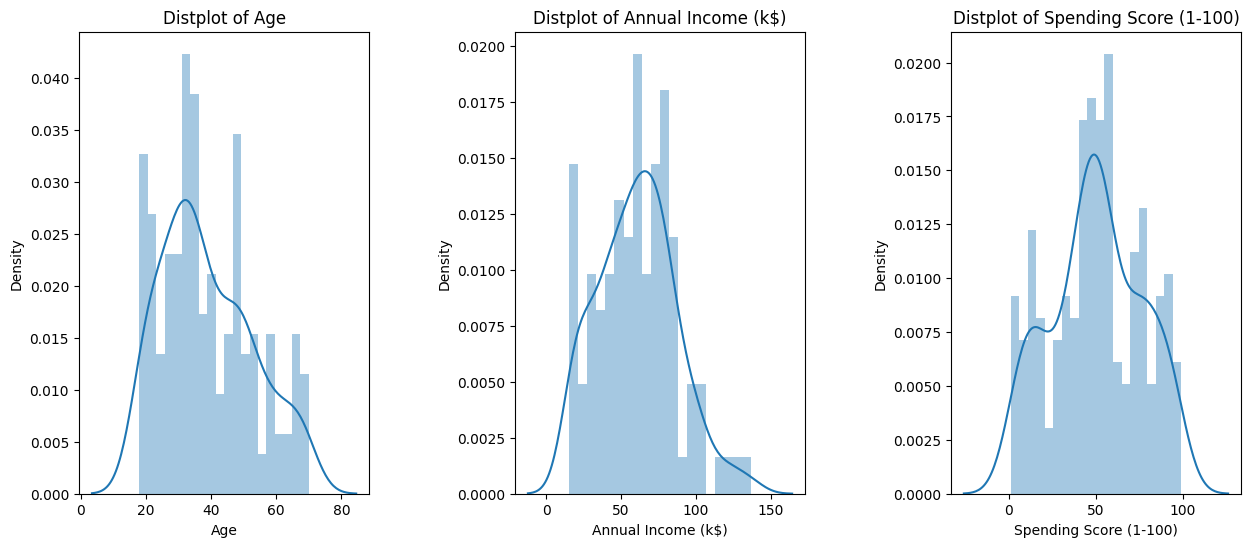

In [37]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

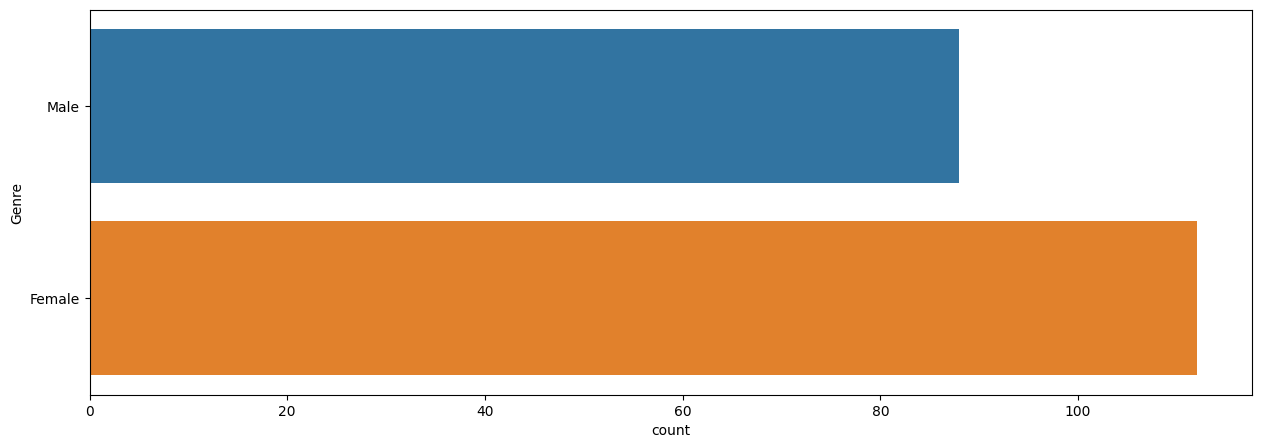

In [38]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Genre' , data = df)
plt.show()

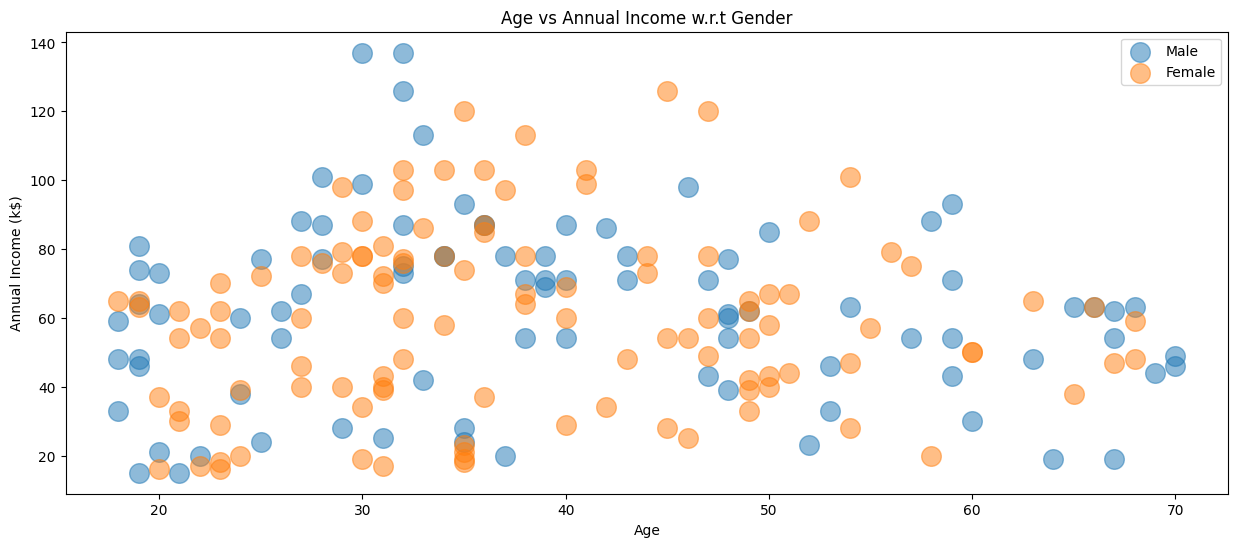

In [39]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

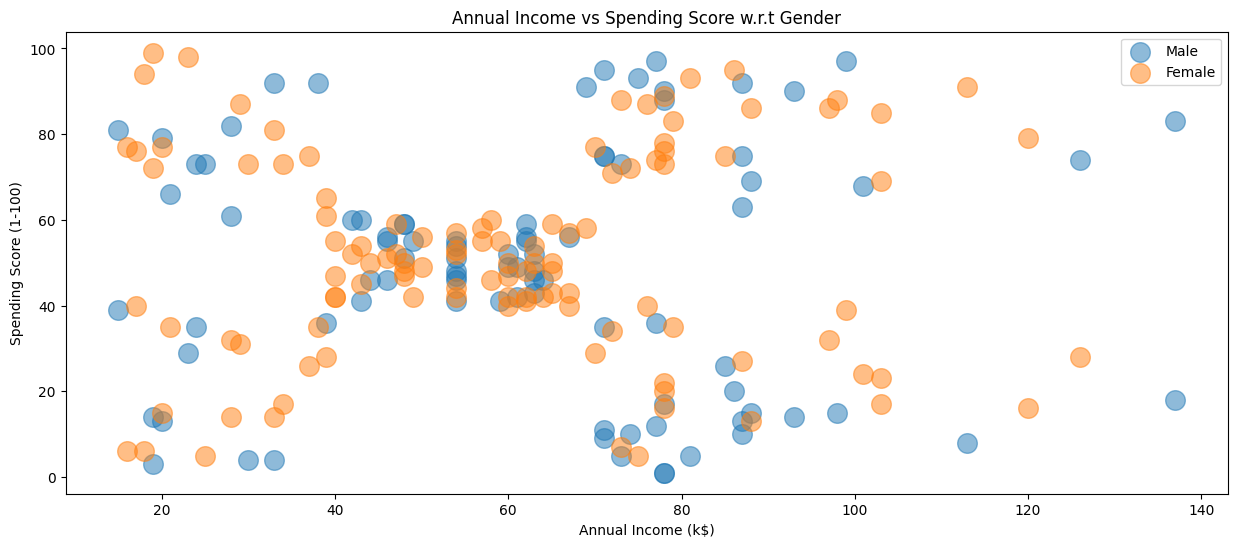

In [40]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [41]:
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# K-Means

<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">K-Means Algorithm Overview</h2>

<p>The K-Means algorithm is a powerful unsupervised machine learning technique used for clustering similar data points into groups or clusters. Here's how it works:</p>

<h3 style="color: #777;">1. <strong>Initialization</strong></h3>
<p>Choose the number of clusters (k) you want to identify in the data.</p>
<p>Randomly initialize k cluster centroids (points that represent the center of each cluster).</p>

<h3 style="color: #777;">2. <strong>Assignment</strong></h3>
<p>For each data point, calculate the distance to all k centroids.</p>
<p>Assign the data point to the cluster whose centroid is the closest.</p>

<h3 style="color: #777;">3. <strong>Update</strong></h3>
<p>Recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.</p>

<h3 style="color: #777;">4. <strong>Repeat</strong></h3>
<p>Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or a maximum number of iterations is reached.</p>

<p>The algorithm aims to minimize the total within-cluster variance, meaning it tries to make data points within a cluster as similar as possible, while keeping clusters distinct.</p>

<h3 style="color: #777;">Key Considerations</h3>
<p>The algorithm's performance can be sensitive to the initial placement of centroids, which is why it is often a good practice to run it multiple times with different initializations and choose the best result.</p>
<p>It is important to choose an appropriate value of k. Too many clusters can lead to overfitting, while too few may result in underfitting.</p>

<p>K-Means is a versatile algorithm with applications in various fields, including customer segmentation, image compression, and anomaly detection.</p>

</div>


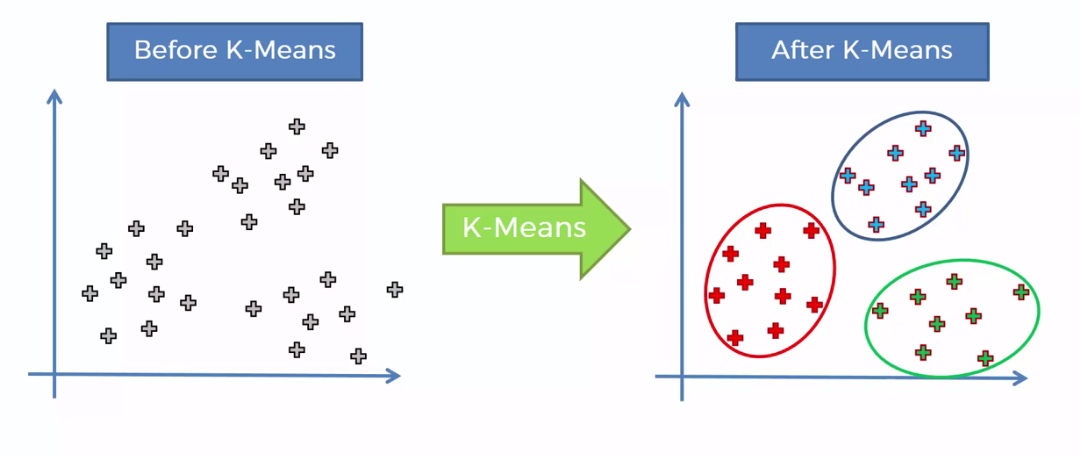

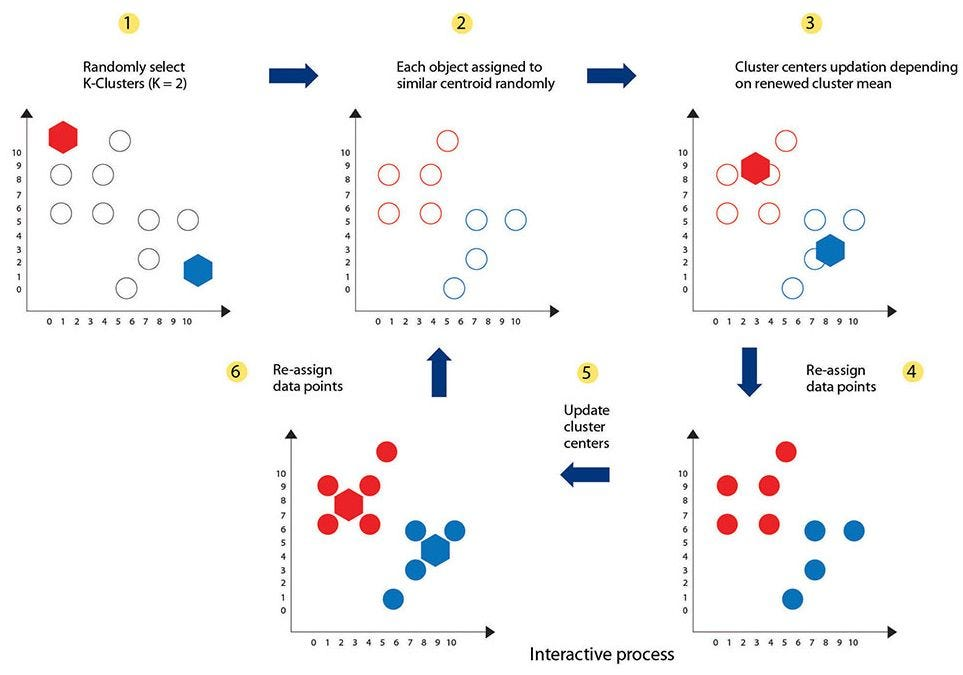

<div style="background-color: #f9f9f9; border: 2px solid #4CAF50; padding: 10px; border-radius: 10px;">

## [**Visualizing K-Means Clustering**](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

This visualization provides a clear demonstration of how K-Means clustering works. It's an excellent resource for gaining an intuitive understanding of the algorithm.

</div>

<div style="background-color: #f9f9f9; border: 2px solid #4CAF50; padding: 10px; border-radius: 10px;">

## [**K-means clustering**](http://shabal.in/visuals/kmeans/3.html)

This interactive visualization allows you to explore K-Means clustering in action. It's a valuable tool for comprehending the nuances of the algorithm.

</div>


In [43]:
from sklearn.cluster import KMeans
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n, random_state = 42) )
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

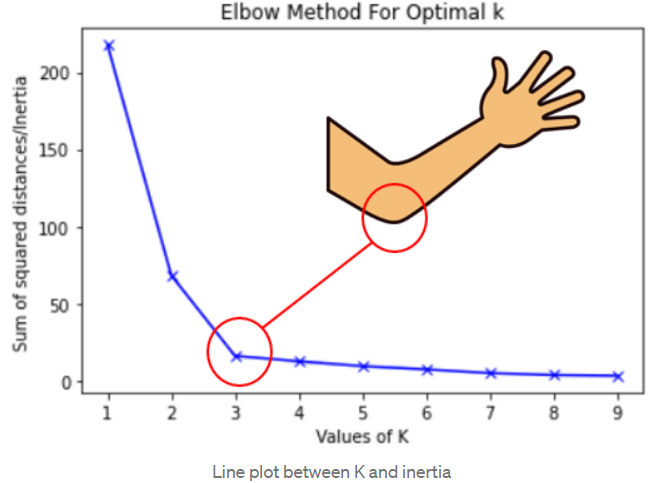

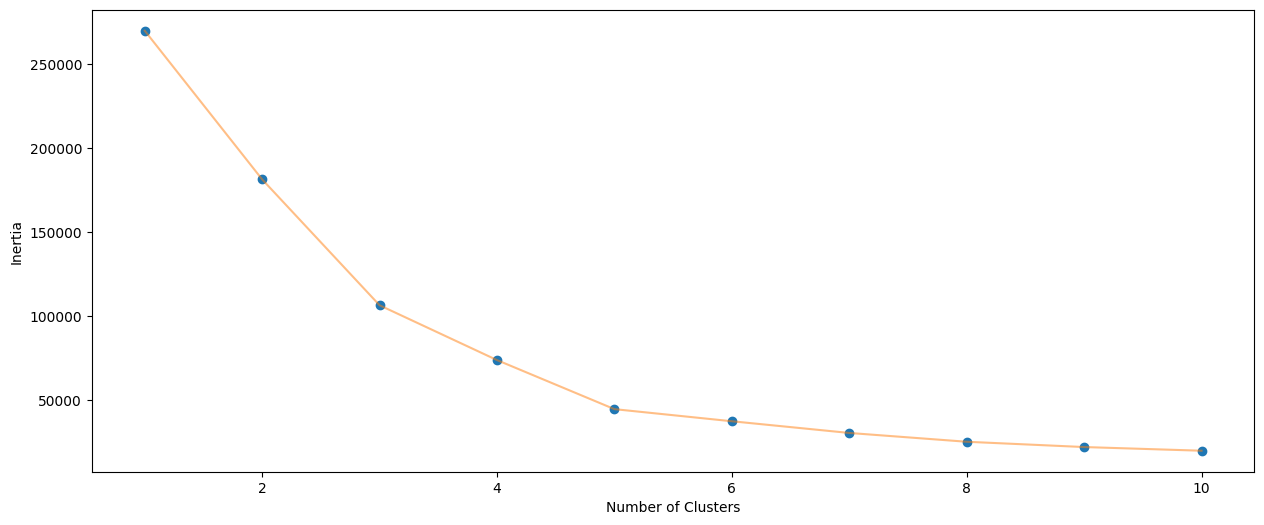

In [44]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [52]:
kmeans = (KMeans(n_clusters = 5 , random_state = 42) )
y1 = kmeans.fit_predict(X1)

In [53]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

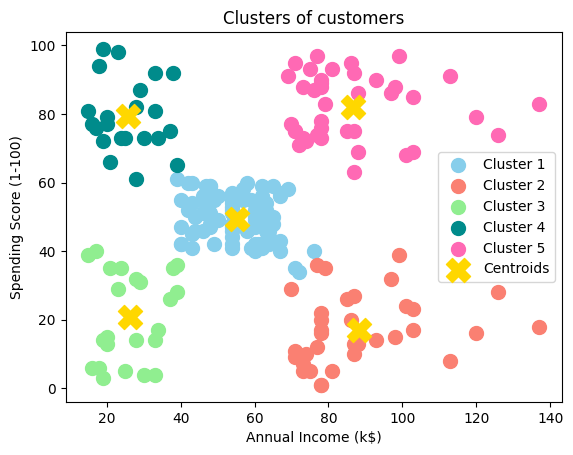

In [54]:
# Define the number of clusters
num_clusters = 5

# Define the colors for clusters
colors = ['skyblue', 'salmon', 'lightgreen', 'darkcyan', "hotpink"]

# Define the labels for clusters
labels = [f'Cluster {i+1}' for i in range(num_clusters)]

# Plot the clusters
for i in range(num_clusters):
    plt.scatter(X1[y1 == i, 0], X1[y1 == i, 1], s=100, c=colors[i], label=labels[i])

# Plot the centroids with a different marker style
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label='Centroids', marker='X')

# Add title and labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [56]:
# Assuming 'kmeans' is your KMeans model
df['Cluster'] = kmeans.predict(X1)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


# DBSCAN

<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">DBSCAN Algorithm Overview</h2>

<p>The Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is a versatile unsupervised machine learning technique used for clustering data points based on their density in feature space. Here's how it works:</p>

<h3 style="color: #777;">1. <strong>Core Points, Border Points, and Noise</strong></h3>
<p>DBSCAN defines three types of data points:</p>
<ul>
    <li><strong>Core Points</strong>: Data points with a sufficient number of neighbors within a specified radius.</li>
    <li><strong>Border Points</strong>: Data points with fewer neighbors than the specified threshold, but within the radius of a core point.</li>
    <li><strong>Noise Points</strong>: Data points that do not meet the criteria to be classified as core or border points.</li>
</ul>

<h3 style="color: #777;">2. <strong>Connectivity and Clusters</strong></h3>
<p>The algorithm forms clusters by connecting core points and border points that are reachable from each other. A cluster may include multiple core points and the border points that are directly or indirectly reachable from those core points.</p>

<h3 style="color: #777;">3. <strong>Parameters: Epsilon and Minimum Points</strong></h3>
<p>DBSCAN requires two parameters:</p>
<ul>
    <li><strong>Epsilon (ε)</strong>: The radius within which the algorithm searches for nearby data points.</li>
    <li><strong>Minimum Points (MinPts)</strong>: The minimum number of data points required to form a core point.</li>
</ul>

<h3 style="color: #777;">Key Considerations</h3>
<p>DBSCAN is particularly effective for data with complex cluster shapes and noise. It does not assume a fixed number of clusters, making it suitable for datasets where the number of clusters is not known in advance.</p>

<p>However, choosing appropriate values for epsilon and minimum points is critical for the algorithm's performance.</p>

<p>DBSCAN has applications in various domains, including spatial data analysis, anomaly detection, and density-based clustering.</p>

</div>


<div style="background-color: #f9f9f9; border: 2px solid #4CAF50; padding: 10px; border-radius: 10px;">

### [**Visualizing DBSCAN Clustering**](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

This interactive visualization provides an insightful representation of how DBSCAN clustering works. It can be a helpful resource to gain a deeper understanding of the algorithm.

</div>


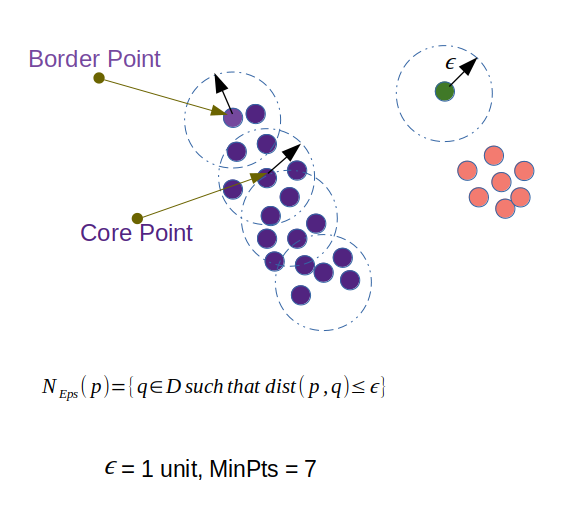

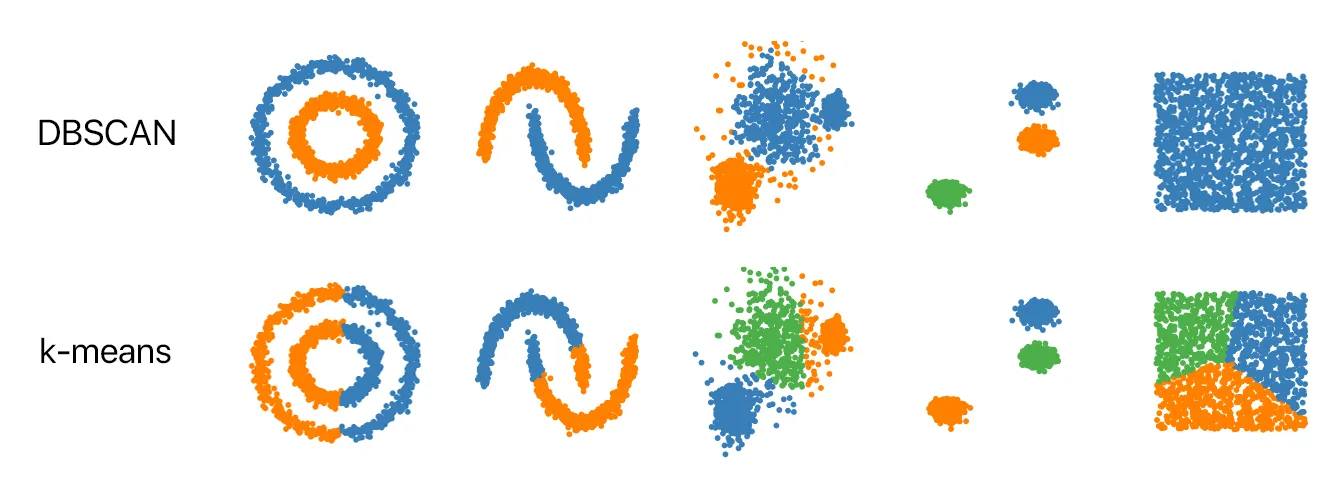

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate Moons dataset for DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

In [59]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

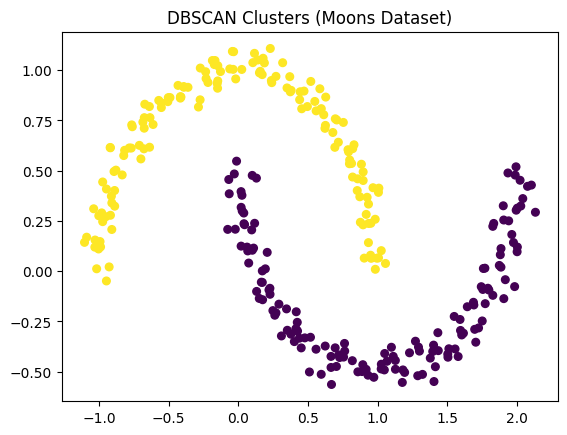

In [60]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=30, cmap='viridis')
plt.title('DBSCAN Clusters (Moons Dataset)')
plt.show()

# Hierarchical Clustering

<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px; font-family: Arial;">

<h2 style="color: #555; text-align: center;">Hierarchical Clustering Overview</h2>

<p>Hierarchical Clustering is a powerful unsupervised machine learning technique used for grouping similar data points into clusters based on their proximity in feature space. Here's how it works:</p>

<h3 style="color: #777;">1. <strong>Agglomerative Clustering</strong></h3>
<p>The algorithm starts by treating each data point as a single cluster. It then successively merges the closest pairs of clusters, iteratively creating a hierarchy of clusters.</p>

<h3 style="color: #777;">2. <strong>Dendrogram</strong></h3>
<p>A dendrogram is a tree-like diagram that visually represents the merging process. It helps in understanding the relationships between data points and clusters.</p>

<h3 style="color: #777;">3. <strong>Cutting the Dendrogram</strong></h3>
<p>By setting a threshold on the dendrogram's height, you can decide how many clusters you want. Cutting the dendrogram at different heights results in different clusterings.</p>

<h3 style="color: #777;">Key Considerations</h3>
<p>Hierarchical clustering is versatile and allows for the exploration of clusters at different levels of granularity. It does not require specifying the number of clusters in advance.</p>

<p>However, it can be computationally expensive, especially with a large number of data points.</p>

<p>Hierarchical clustering is used in various fields, including biology (for example, in DNA sequence analysis), social sciences, and customer segmentation.</p>

<p style="text-align: center; color: #777;">Explore the intricacies of hierarchical clustering to uncover meaningful patterns in your data!</p>

</div>


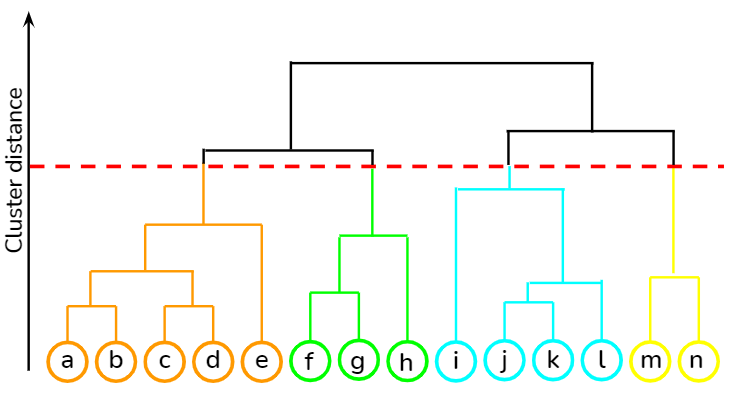

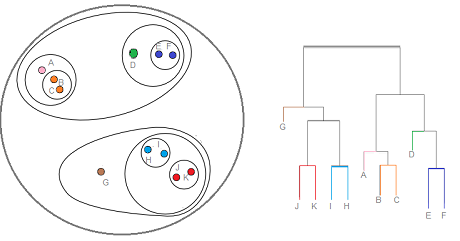

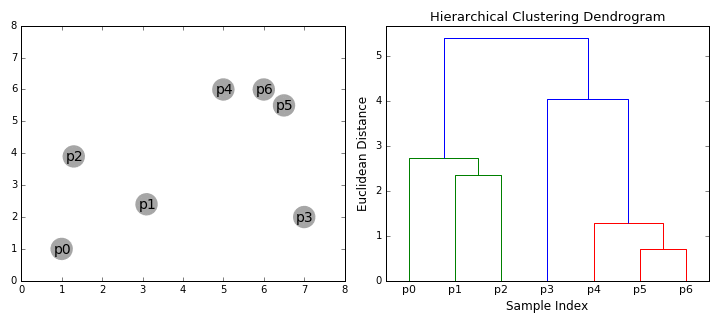

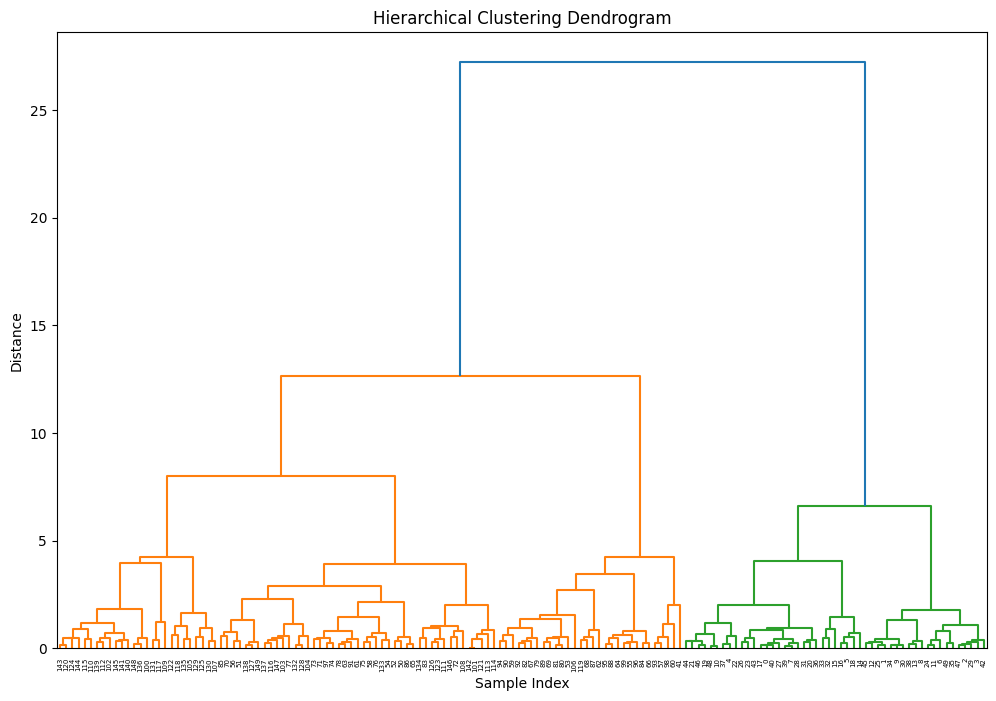

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
data = load_iris()
X = data.data
df = pd.DataFrame(X, columns=data.feature_names)

# Step 1: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate a dendrogram
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [63]:
# Step 3: Apply Hierarchical Clustering with 3 clusters
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_clustering.fit_predict(X_scaled)

# Step 4: Add cluster labels to the original DataFrame 'df'
df['Cluster'] = cluster_labels

# View the updated DataFrame with cluster labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [64]:
from sklearn.metrics import confusion_matrix

# Original labels
original_labels = data.target

# Create a contingency table
contingency_table = confusion_matrix(original_labels, cluster_labels)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Calculate accuracy
accuracy = contingency_table.max(axis=1).sum() / contingency_table.sum()
print(f"\nAccuracy: {accuracy:.2f}")


Contingency Table:
[[ 0 49  1]
 [23  0 27]
 [48  0  2]]

Accuracy: 0.83


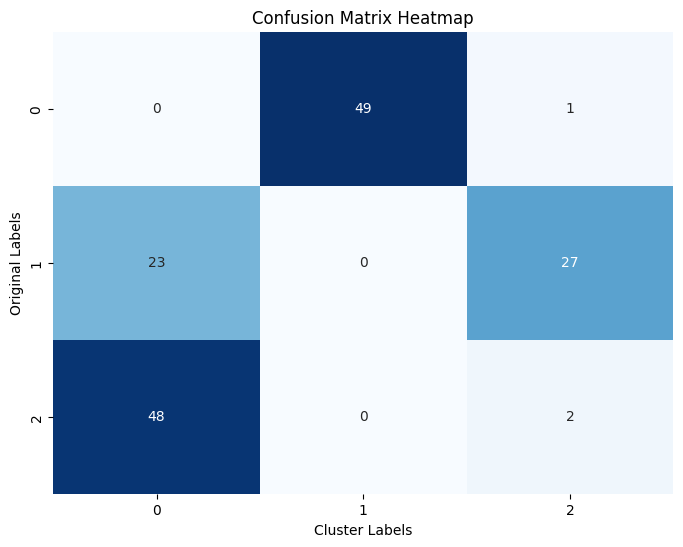

In [65]:
# Create the confusion matrix
confusion_matrix = contingency_table

# Set up the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot
plt.xlabel('Cluster Labels')
plt.ylabel('Original Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()